In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', na_values=-200, decimal=',', parse_dates=['Date', 'Time'])

In [18]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [19]:
df = df.drop(columns = ['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16', 'NMHC(GT)'])

In [20]:
df = df.dropna()
# df.to_csv('AirQualityUCI.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         6941 non-null   float64
 1   PT08.S1(CO)    6941 non-null   float64
 2   C6H6(GT)       6941 non-null   float64
 3   PT08.S2(NMHC)  6941 non-null   float64
 4   NOx(GT)        6941 non-null   float64
 5   PT08.S3(NOx)   6941 non-null   float64
 6   NO2(GT)        6941 non-null   float64
 7   PT08.S4(NO2)   6941 non-null   float64
 8   PT08.S5(O3)    6941 non-null   float64
 9   T              6941 non-null   float64
 10  RH             6941 non-null   float64
 11  AH             6941 non-null   float64
dtypes: float64(12)
memory usage: 704.9 KB


In [23]:
scaler = StandardScaler()

In [24]:
X_train, y_train, X_test, y_test = train_test_split(df.drop('C6H6(GT)', axis=1), df['C6H6(GT)'])

In [25]:
lm = LinearRegression()
lm = lm.fit(scaler.fit_transform(df_train.drop(columns='C6H6(GT)')), df_train['C6H6(GT)'])

In [26]:
predicted = lm.predict(scaler.transform(df_test.drop(columns='C6H6(GT)')))
real = df_test['C6H6(GT)']

In [27]:
def metrics(predicted, real):
    plt.scatter(x=predicted, y=real)
    plt.show()
    return({'adj_r2': r2_score(real, predicted), 
            'MAE': mean_absolute_error(real, predicted)})
    

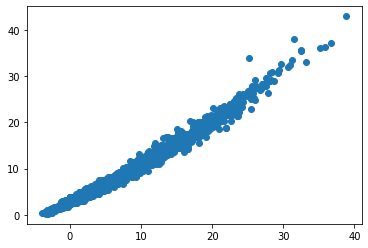

{'adj_r2': 0.9074794915869198, 'MAE': 1.7448148911458545}

In [28]:
metrics(predicted, real)